In [14]:
'''# otsu thresholding
def twolevel_thresholding(img,x):
    import matplotlib.pyplot
    import numpy
#bins optimieren.... alles zu 0-255 machen


   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins = numpy.histogram(img.flatten(),bins = x)

   # initialize threshold value (T = 0) 
    thres = 0
 
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    wcv = list()
    wcv_t = list()
    
    # set up initial values
    for i in range(0,len(n)):
        for t in range(0,len(n)):
            wclv = 0
            w0_sum = 0
            mean_sum0 = 0
            v0_sum = 0
            mean_sum1 = 0
            v1_sum = 0
            w0 = 0
            w1 = 0
            w1_sum = 0
            w2_sum = 0
            w2 = 0
            mean_sum2 = 0
            mean_2 = 0
            v2 = 0
            v2_sum = 0
            

            #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
            for j in range(0,i+1):
                #if(n[j] != 'NA' & bins[j] != 'NA'): 
                    w0_sum += n[j]
                    mean_sum0 += bins[j]*n[j]
                
            # background class probabilites and class mean levels
            w0 = w0_sum / sum(n)  
            if(sum(n[0:i+1]) != 0):  
                mean_0 = mean_sum0 / sum(n[0:i+1])
            else: mean_0 = 0
            
            # compute background class variance
            for m in range(0,i+1):
                #if(n[m] != 'NA' & bins[m] != 'NA'): 
                    v0_sum += ((bins[m]-mean_0)** 2) * n[m]
            
            v0 = v0_sum / sum(n[0:i+1])
            
            # sum up the probabilites of each intensity value;  and the mean value
            for k in range(i+1, t): 
                #if(n[k] != 'NA'& bins[k] != 'NA'): 
                    w1_sum += n[k]
            
                    mean_sum1 += bins[k]*n[k]

            # compute foreground class probabilities and class mean levels    
            w1 = w1_sum / sum(n)
        
            if(sum(n[i+1:t]) != 0):
                mean_1 = mean_sum1 / sum(n[i+1:t])
            else: mean_1 = 0
            # compute foreground class variance 
            for s in range(i+1,t):
                #if(n[s] != 'NA' & bins[s] != 'NA'): 
                    v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
            if( sum(n[i+1:t]) != 0):
                v1 = v1_sum / sum(n[i+1:t])
            else: v1 = 0

            for q in range(t+1, len(n)): 
                #if(n[k] != 'NA'& bins[k] != 'NA'): 
                    w2_sum += n[q]
            
                    mean_sum2 += bins[q]*n[q]

            # compute foreground class probabilities and class mean levels    
            w2 = w2_sum / sum(n)
        
            if(sum(n[t+1:len(n)]) != 0):
                mean_2 = mean_sum2 / sum(n[t+1:len(n)])
            else: mean_2 = 0
            # compute foreground class variance 
            for r in range(t+1,len(n)):
                #if(n[s] != 'NA' & bins[s] != 'NA'): 
                    v2_sum += ((bins[r]-mean_2) ** 2) * n[r]
            if( sum(n[t+1:len(n)]) != 0):
                v2 = v2_sum / sum(n[t+1:len(n)])
            else: v2 = 0



            # compute within class variance and append to list
            wclv = (w0 * v0) + (w1 * v1) + (w2 * v2)
            wcv_t.append(wclv)
            
        wcv.append(wcv_t)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(wcv)

    #select optimal threshold in the list
    l = 0
    o = 0
    while l < len(wcv):
        while o < len(wcv[l]):
            if wcv[l][o] == optimal_thres: break
            o += 1
        l += 1
    thres1 = l
    thres2 = o 

    #perform image clipping 
    for o in numpy.ndindex(copy.shape):
        if copy[o] < (thres1): 
            copy[o] = 0
        elif copy[o] > thres1 & copy[o] < thres2: 
            copy[o] = 0.5 
        else:
            copy[o] = 1


    return copy 
'''

In [53]:
from cmath import nan


def twolevel_thresholding(img,x):
    import matplotlib.pyplot
    import numpy

   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins = numpy.histogram(img.flatten(),bins = x)
  
   # initialize threshold value (T = 0) 
    thres = list()
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    wcv = list()
    threshold = list()
    # set up initial values
    for i in range(0,len(n)):
        for t in range(0,len(n)):
            wclv = 0
            w0_sum = 0
            mean_sum0 = 0
            v0_sum = 0
            mean_sum1 = 0
            v1_sum = 0
            w0 = 0
            w1 = 0
            w1_sum = 0
            w2_sum = 0
            w2 = 0
            mean_sum2 = 0
            mean_2 = 0
            v2 = 0
            v2_sum = 0
            #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
            w0_sum = numpy.sum(numpy.array(n[0:i+1]))
            mean_sum0 = numpy.sum((numpy.array(bins[0:i+1])*numpy.array(n[0:i+1])))
                
            # background class probabilites and class mean levels
            w0 = w0_sum / sum(n)  
            if(sum(n[0:i+1]) != 0):  
                mean_0 = mean_sum0 / sum(n[0:i+1])
            else: mean_0 = 0
            
            # compute background class variance

            v0_sum = numpy.sum((numpy.array((bins[0:i+1]-mean_0)** 2)*numpy.array(n[0:i+1])))
            v0 = v0_sum / sum(n[0:i+1])
            
            # sum up the probabilites of each intensity value;  and the mean value
            w1_sum = numpy.sum(numpy.array(n[i+1:t]))
            mean_sum1 = numpy.sum((numpy.array(bins[i+1:t])*numpy.array(n[i+1:t])))
                
            # compute foreground class probabilities and class mean levels    
            w1 = w1_sum / sum(n)
            if(sum(n[i+1:t]) != 0):
                mean_1 = mean_sum1 / sum(n[i+1:t])
            else: mean_1 = 0

            # compute foreground class variance 
            v1_sum = numpy.sum((numpy.array((bins[i+1:t]-mean_1)** 2)*numpy.array(n[i+1:t])))
        
            if( sum(n[i+1:t]) != 0):
                v1 = v1_sum / sum(n[i+1:t])
            else: v1 = 0

            # sum up the probabilites of each intensity value;  and the mean value
            w2_sum = numpy.sum(numpy.array(n[t:len(n)]))
            mean_sum2 = numpy.sum((numpy.array(bins[t:len(n)])*numpy.array(n[t:len(n)])))
                
            # compute foreground class probabilities and class mean levels    
            w2 = w2_sum / sum(n)
            if(sum(n[t:len(n)]) != 0):
                mean_2 = mean_sum2 / sum(n[t:len(n)])
            else: mean_2 = 0

            # compute foreground class variance 
            v2_sum = numpy.sum((numpy.array((bins[t:len(n)]-mean_2)** 2)*numpy.array(n[t:len(n)])))
        
            if( sum(n[t:len(n)]) != 0):
                v2 = v2_sum / sum(n[t:len(n)])
            else: v2 = 0

            # compute within class variance and append to list
            wclv = (w0 * v0) + (w1 * v1) + (w2 * v2)
            thresholds = [i,t]
            wcv.append(wclv)
            threshold.append(thresholds)


    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(wcv)

    #select optimal threshold in the list
    l = 0
    while l < len(wcv):
        if wcv[l] == optimal_thres: thres.append(threshold[l])
        l += 1

    thres = thres[0]
    thres1  = bins[thres[0]]
    thres2  = bins[thres[1]]
    
    #index = numpy.where(numpy.array(wcv) == optimal_thres)
    #thres = bins[index]
    #perform image clipping 
    #copy[copy < thres[0]] = 0
    #copy[copy >= thres[0] and copy < thres[1]] = 0.5
    #copy[copy >= thres[1]] = 1

    for o in numpy.ndindex(copy.shape):
        if copy[o] < (thres1): 
            copy[o] = 0
        elif copy[o] >= thres1 and copy[o] < thres2:  
            copy[o] = 0.5
        else: 
            copy[o] = 1
            
    return copy 

In [2]:
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot
from images_segmentation import dicescore as dsc
import os

from PIL import Image
import os, os.path

imgs = []
path = r"data\Otsu_data\NIH3T3\img"
for f in os.listdir(path):
    imgs.append(imread(os.path.join(path,f)))

imgs_gt = []
path = r"data\Otsu_data\NIH3T3\gt"
for f in os.listdir(path):
    imgs_gt.append(imread(os.path.join(path,f)))

Using matplotlib backend: <object object at 0x0000023D3482C780>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


d:\Anaconda\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['nan']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [60]:
two1 = twolevel_thresholding(imgs[0],256)
two10 =  twolevel_thresholding(imgs[10],256)


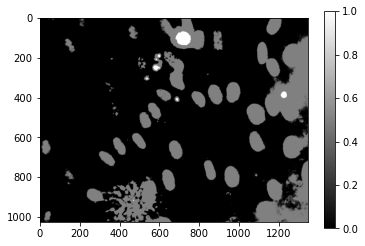

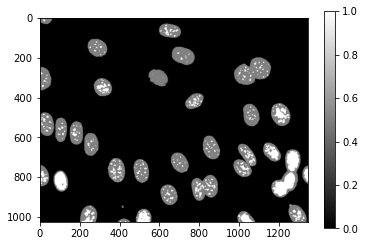

In [65]:
figure()
imshow(two10, 'gray')
colorbar()

figure()
imshow(two1, 'gray')
colorbar()


In [62]:
def reassign(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

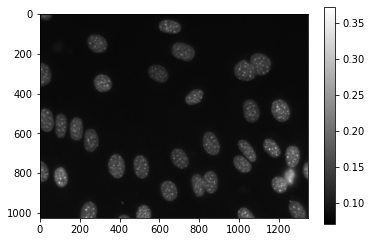

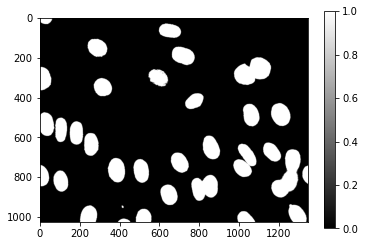

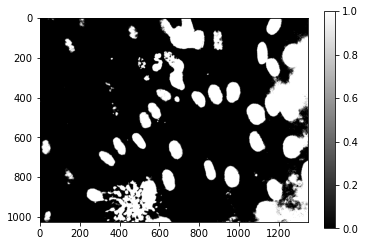

In [68]:
figure()
imshow(imgs[0], 'gray')
colorbar()

two_1r = reassign(two1)
figure()
imshow(two_1r, 'gray')
colorbar()

two_10r = reassign(two10)
figure()
imshow(two_10r, 'gray')
colorbar()

In [51]:
def foreground_dice(gt,pt):
    #gt and pt are numpy arrays containing pixel intensities
    product1 = np.multiply(gt,pt)
    gt2 = gt-1
    pt2 = pt-1
    product2 = np.multiply(gt2,pt2)
    tp = np.count_nonzero(product1)
    tn = np.count_nonzero(product2)
    all = np.prod(gt2.shape)
    dsc = 2*tp/(tp + all-tn)
    return dsc

In [67]:
print(foreground_dice(two_1r, imgs_gt[0]))
print(foreground_dice(two_10r, imgs_gt[10]))

0.9417263695042412
0.6454109779570866
